# Heart Disease - Exploratory Data Analysis 

# 1. Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import warnings
warnings.filterwarnings('ignore')

# 2. Load the Dataset

In [26]:
df = pd.read_csv('C:/Users/shree/Downloads/heart.csv')

# 3. Basic Data Inspection

In [27]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
print("\nDataset Shape:", df.shape)


Dataset Shape: (1025, 14)


In [41]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 4. Statistical Summary

In [30]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 5. Checking Duplicates

In [31]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 723


# 6. Exploratory Data Analysis (EDA)

# 6.1 Correlation Heatmap

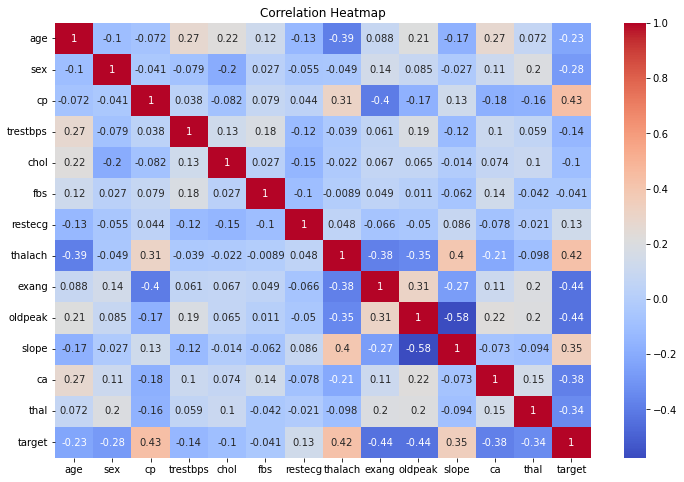

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 6.2 Target Variable Distribution

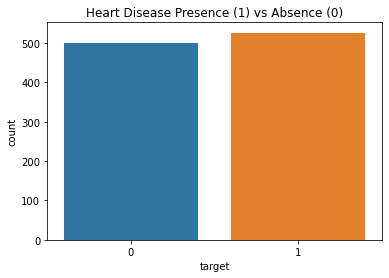

In [33]:
sns.countplot(data=df, x='target')
plt.title('Heart Disease Presence (1) vs Absence (0)')
plt.show()

# 6.3 Age Distribution

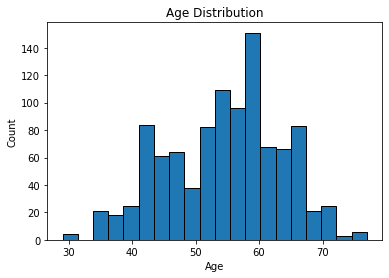

In [45]:
plt.hist(df['age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 6.4 Cholesterol Distribution

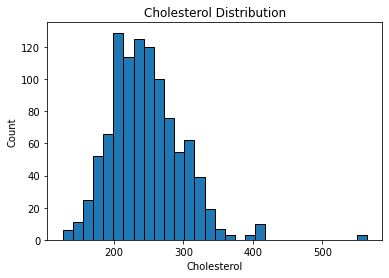

In [35]:
plt.hist(df['chol'], bins=30, edgecolor='k')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

# 6.5 Gender vs Heart Disease

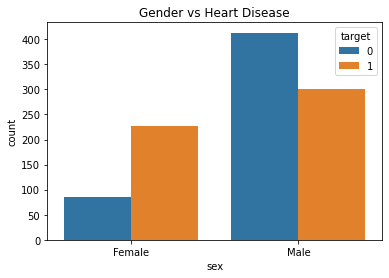

In [36]:
sns.countplot(data=df, x='sex', hue='target')
plt.title('Gender vs Heart Disease')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

# 6.6 Age Group vs Heart Disease Risk

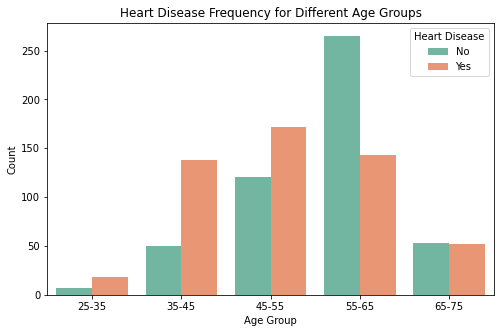


Percentage of people with Heart Disease in each Age Group:
age_group
25-35    72.000000
35-45    73.404255
45-55    58.703072
55-65    35.049020
65-75    49.523810
Name: target, dtype: float64


In [46]:
# Create Age Bins
df['age_group'] = pd.cut(df['age'], bins=[25, 35, 45, 55, 65, 75], labels=['25-35', '35-45', '45-55', '55-65', '65-75'])

# Plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='age_group', hue='target', palette='Set2')
plt.title('Heart Disease Frequency for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Insight
age_hd = df.groupby('age_group')['target'].mean()
print("\nPercentage of people with Heart Disease in each Age Group:")
print(age_hd * 100)


Insight:
- People in the age group **45-55** and **55-65** show a **higher prevalence** of heart disease.
- Heart disease cases sharply **increase after 45 years** of age.

# 6.7 Cholesterol Level vs Heart Disease

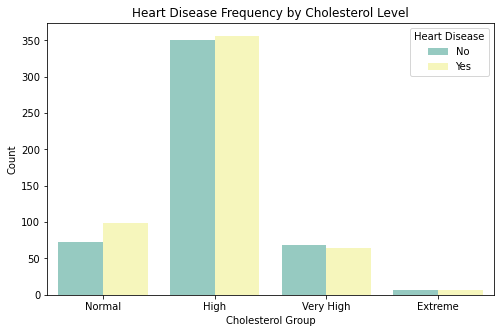


Percentage of people with Heart Disease in each Cholesterol Group:
chol_group
Normal       57.558140
High         50.353607
Very High    48.872180
Extreme      46.153846
Name: target, dtype: float64


In [47]:
# Cholesterol bins
df['chol_group'] = pd.cut(df['chol'], bins=[0, 200, 300, 400, 600], labels=['Normal', 'High', 'Very High', 'Extreme'])

# Plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='chol_group', hue='target', palette='Set3')
plt.title('Heart Disease Frequency by Cholesterol Level')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Insight
chol_hd = df.groupby('chol_group')['target'].mean()
print("\nPercentage of people with Heart Disease in each Cholesterol Group:")
print(chol_hd * 100)


Insight:
- Individuals with **higher cholesterol levels** (above 200) are **more likely** to have heart disease.
- However, **normal cholesterol** alone does **not guarantee** absence of heart disease — other factors contribute too.


# 6.8  Gender vs Heart Disease Risk


Heart Disease Rate by Gender:
sex
0    72.435897
1    42.075736
Name: target, dtype: float64


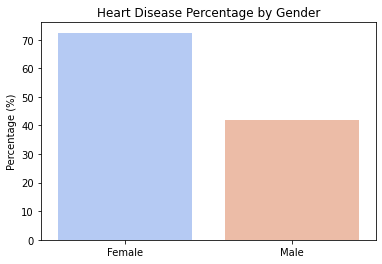

In [48]:
# 0 = Female, 1 = Male
gender_hd = df.groupby('sex')['target'].mean()
print("\nHeart Disease Rate by Gender:")
print(gender_hd * 100)

sns.barplot(x=['Female', 'Male'], y=gender_hd.values*100, palette='coolwarm')
plt.title('Heart Disease Percentage by Gender')
plt.ylabel('Percentage (%)')
plt.show()


Insight:
- **Males** have a **higher percentage** of heart disease compared to females in this dataset.
- Indicates **gender** could be a **risk factor** but needs to be considered with other features.


# 6.9 Chest Pain Type vs Heart Disease

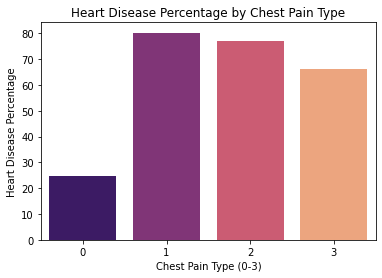


Interpretation:
0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic


In [49]:
# cp: chest pain type (0-3)
# 0: Typical angina
# 1: Atypical angina
# 2: Non-anginal pain
# 3: Asymptomatic

cp_hd = df.groupby('cp')['target'].mean()

sns.barplot(x=cp_hd.index, y=cp_hd.values*100, palette='magma')
plt.title('Heart Disease Percentage by Chest Pain Type')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Heart Disease Percentage')
plt.show()

print("\nInterpretation:\n0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic")


In [ ]:
Insight:
- People with **asymptomatic chest pain** (type 3) have the **highest** probability of heart disease.
- In contrast, those with **typical angina** (type 0) have a **lower** probability.
- Chest pain type is a **very strong predictor**.


# 6.10 Resting Blood Pressure vs Heart Disease

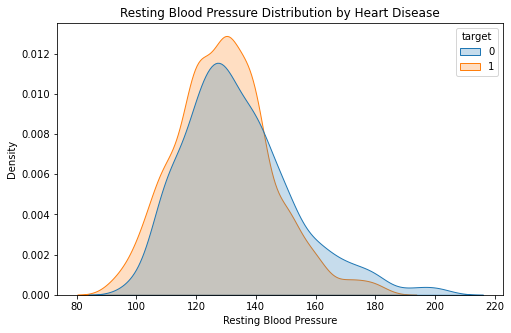

In [50]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='trestbps', hue='target', shade=True)
plt.title('Resting Blood Pressure Distribution by Heart Disease')
plt.xlabel('Resting Blood Pressure')
plt.show()

Insight:
- The blood pressure distribution is **similar** between people with and without heart disease.
- **Slightly higher blood pressure** may be associated with heart disease but it is **not a strong separable feature** alone.

# 6.11 Maximum Heart Rate (thalach) Analysis

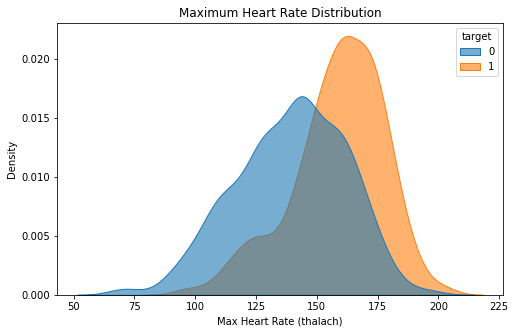

In [52]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='thalach', hue='target', fill=True, common_norm=False, alpha=0.6)
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Max Heart Rate (thalach)')
plt.show()

Insight:
- People with **heart disease** often have **lower maximum heart rates** achieved compared to those without.

# 6.12 Fasting Blood Sugar (fbs) Impact

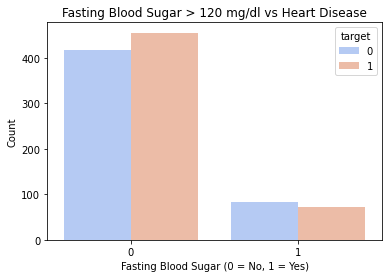

In [53]:
sns.countplot(data=df, x='fbs', hue='target', palette='coolwarm')
plt.title('Fasting Blood Sugar > 120 mg/dl vs Heart Disease')
plt.xlabel('Fasting Blood Sugar (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



Insight:
- **High fasting blood sugar** alone **doesn't seem like a strong standalone predictor** but may contribute when combined with others.


# 6.13 ST depression (oldpeak) vs Heart Disease

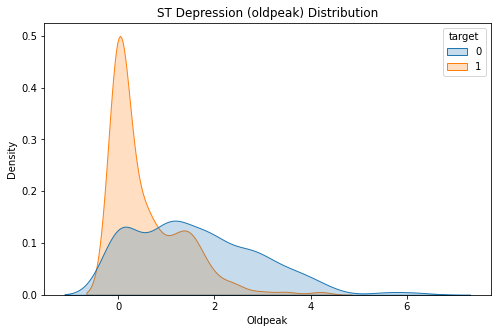

In [55]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='oldpeak', hue='target', fill=True)
plt.title('ST Depression (oldpeak) Distribution')
plt.xlabel('Oldpeak')
plt.show()

Insight:
- **Higher ST depression** is **strongly associated** with heart disease.

# 6.14 Exercise Induced Angina (exang)

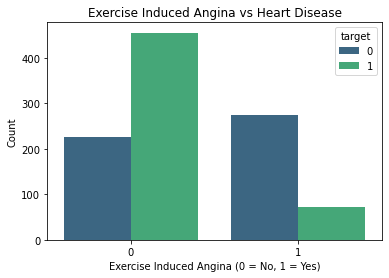

In [54]:
sns.countplot(data=df, x='exang', hue='target', palette='viridis')
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Insight:
- Presence of **exercise-induced angina significantly increases** the risk of heart disease.

# 6.15 Slope of Peak Exercise ST Segment (slope)

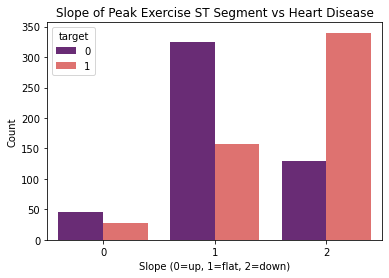

In [56]:
sns.countplot(data=df, x='slope', hue='target', palette='magma')
plt.title('Slope of Peak Exercise ST Segment vs Heart Disease')
plt.xlabel('Slope (0=up, 1=flat, 2=down)')
plt.ylabel('Count')
plt.show()

Insight:
- **Flat or downsloping ST** segments are **more common** among heart disease patients.


# 6.16 Major Vessels Colored by Fluoroscopy (ca)

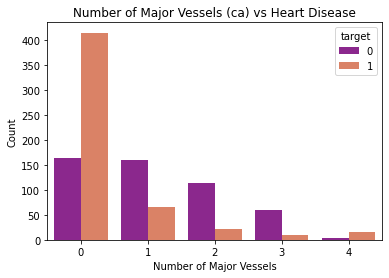

In [57]:
sns.countplot(data=df, x='ca', hue='target', palette='plasma')
plt.title('Number of Major Vessels (ca) vs Heart Disease')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.show()

Insight:
- **Higher number of colored vessels** correlates with **greater heart disease risk**.

# 6.17 Pairplot of Key Features

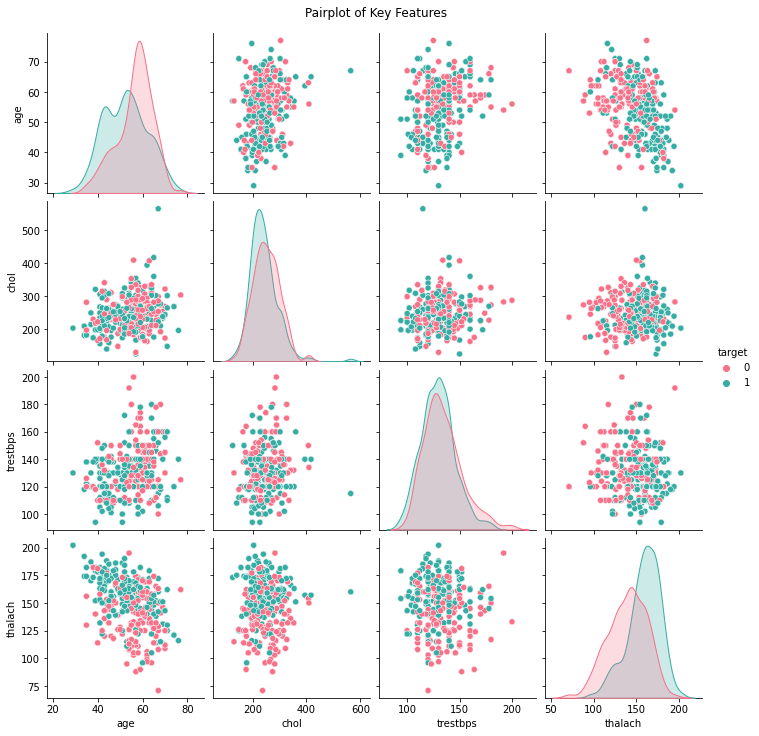

In [51]:
sns.pairplot(df[['age', 'chol', 'trestbps', 'thalach', 'target']], hue='target', palette='husl')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

Insight:
- Pairwise relationships show that features like **cholesterol**, **age**, and **max heart rate** are **visibly different** for patients with and without heart disease.
- Feature engineering and combination of features will be important for better predictions.


# 7. Data Preprocessing

# 7.1 Encoding categorical features if needed (already numeric here)

# Checking unique values

In [37]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in sex: [1 0]

Unique values in cp: [0 1 2 3]

Unique values in fbs: [0 1]

Unique values in restecg: [1 0 2]

Unique values in exang: [0 1]

Unique values in slope: [2 0 1]

Unique values in ca: [2 0 1 3 4]

Unique values in thal: [3 2 1 0]

Unique values in target: [0 1]


# 7.2 Feature Scaling (StandardScaler or MinMaxScaler)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

print("\nScaled Features Sample:")
display(scaled_df.head())


Scaled Features Sample:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


# 8. Final Dataset ready for ML

In [39]:
X = scaled_df
y = df['target']

print("\nFeature set (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Feature set (X) shape: (1025, 13)
Target (y) shape: (1025,)


# ---------------------------------------
# 🎯 Notebook End: Next Step - Build ML Model
# ---------------------------------------